# 9. Gnuplot - narzędzie do wizualizacji danych: część 2.

In [47]:
%reload_ext gnuplot_kernel
%gnuplot inline pngcairo size 1024,600

## __9.1 Dopasowanie funkcji__

`Gnuplot` oferuje możliwość dopasowania funkcji do naszych danych. W poniższym przykładzie dopasowany zostanie wielomian 3. stopnia do sztucznie wygenerowanych danych z pliku `fake_data.dat`.

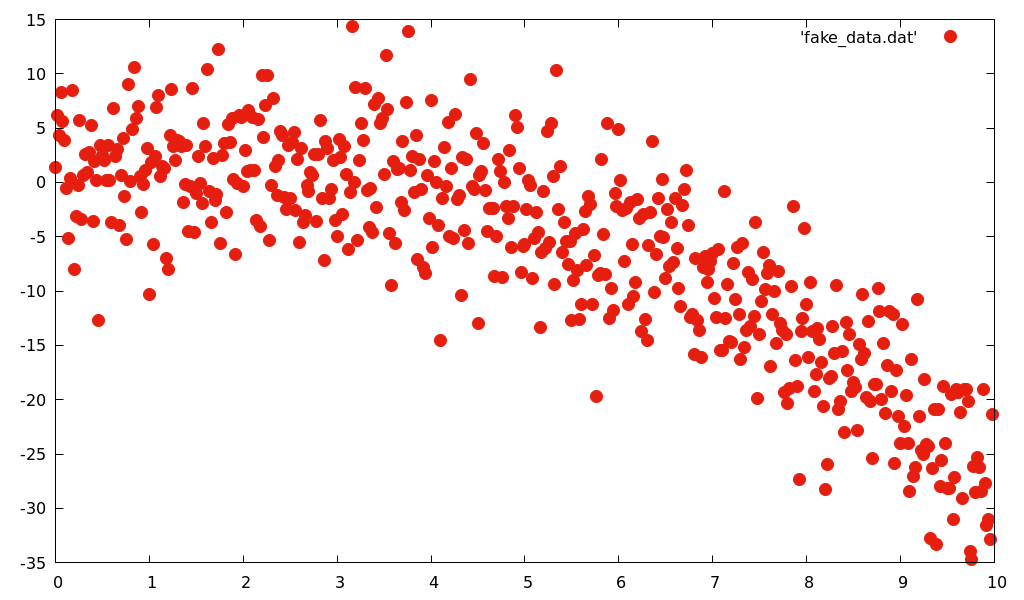

In [48]:
%%gnuplot
plot 'fake_data.dat' w p pt 7 lc 7 ps 2

Dopasowania dokonuje się za pomocą komendy `fit`. Należy wskazać jaką funkcję chcemy dopasować (model) oraz jakie parametry z modelu mają być dopasowane. Najpierw definuję funkcję, wielomian trzeciego stopnia o wzorze ogólnym: $Ax^3+Bx^2+Cx+D$, a potem definiuję dopasowanie tejże funkcji i wskazanie parametrów (poprzez `via`).

In [55]:
%%gnuplot
f(x) = a*x**3 + b*x**2 + c*x +d

In [56]:
%%gnuplot
fit f(x) 'fake_data.dat' via a,b,c,d    # dopasowanie f(x) do danych z pliku

fit f(x) 'fake_data.dat' via a,b,c,d    # dopasowanie f(x) do danych z pliku
iter      chisq       delta/lim  lambda   a             b             c             d            
   0 9.5588307596e+07   0.00e+00  1.90e+02    1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00
   1 2.2891189774e+04  -4.17e+08  1.90e+01   -8.639177e-02   3.897009e-01   8.396685e-01   9.619046e-01
   2 1.1933359374e+04  -9.18e+04  1.90e+00   -1.679422e-02  -1.969476e-01   7.219485e-01   9.696061e-01
   3 1.1928691432e+04  -3.91e+01  1.90e-01   -1.389910e-02  -2.310978e-01   7.898800e-01   1.049631e+00
   4 1.1928690723e+04  -5.95e-03  1.90e-02   -1.388665e-02  -2.312047e-01   7.895445e-01   1.052335e+00
iter      chisq       delta/lim  lambda   a             b             c             d            

After 4 iterations the fit converged.
final sum of squares of residuals : 11928.7
rel. change during last iteration : -5.94948e-08

degrees of freedom    (FIT_NDF)                        : 496
rms of residu

<br>Dostajemy pełen opis tego, co zostało wykonane. W tym przypadku zostały wykonane 4 iteracje do uzyskania rozwiązania. Następnie wyświetlone są uzyskane parametry (a, b, c, d) wraz z błędami:<br>
$a = -0.0138867$<br>$b = -0.231205$<br>$c = 0.789545$<br>$d = 1.05233$.<br> Można wyrysować dopasowaną funkcję. Dodatkowo czarną kreskowaną linią została zaznnaczona prawdziwa funkcja, na bazie której wygenerowane zostały sztuczne dane. Warto tutaj również wspomnieć, że można określić jaka nazwa ma być wypisana w legendzie za pomocą `title` w komendzie `plot`. Odstępstwo dopasowania od prawdziwej funkcji nie jest duże.

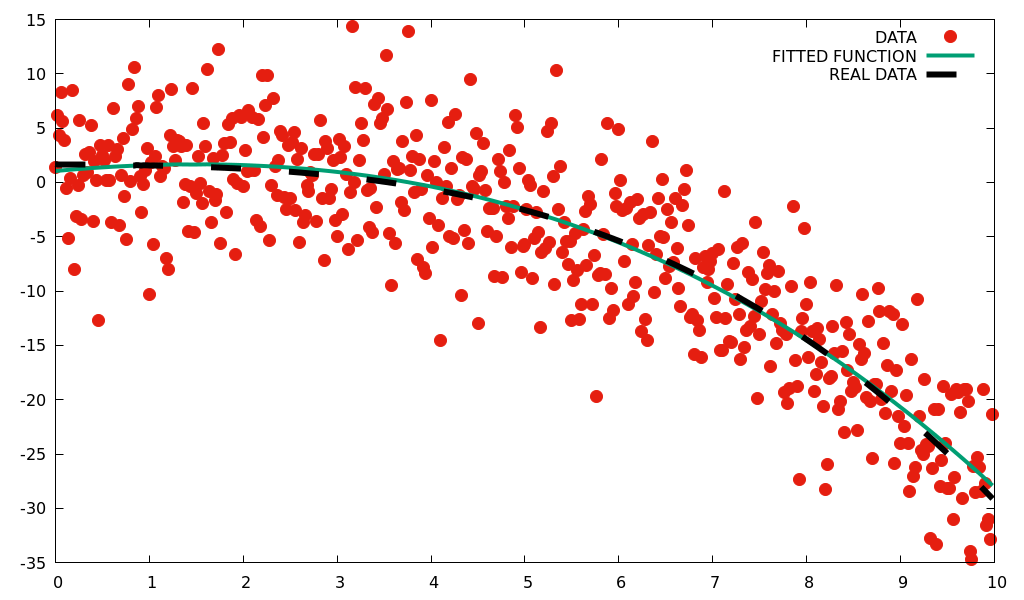

In [51]:
%%gnuplot
p 'fake_data.dat' w p pt 7 lc 7 ps 2 title "DATA", a*x**3+b*x**2+c*x+d w l lw 4 lc 2 title 'FITTED FUNCTION', 'gen_data.dat' w l lc 8 lw 6 dt 2 title "REAL DATA"

## __9.2 Histogram__

Histogram w `gnuplot`-cie rysuje się również za pomocą komendy `plot` (trzeba mieć oczywiście odpowiednie dane do histogramu) i modyfikatora `w(ith) boxes` - to co w nawiasie jest opcjonalne.
Dane w pliku `histogram.dat`: są następujące (pierwsza kolumna: środek binu, druga kolumna: liczebność):
```
-4.01733 3
-3.63559 0
-3.25386 4
-2.87212 3
-2.49038 14
-2.10864 36
-1.72690 54
-1.34516 104
-0.96342 206
-0.58168 276
-0.19994 331
0.18179 263
0.56353 252
0.94527 179
1.32701 133
1.70875 91
2.09049 36
2.47223 10
2.85397 2
3.23571 0
3.61744 2
```

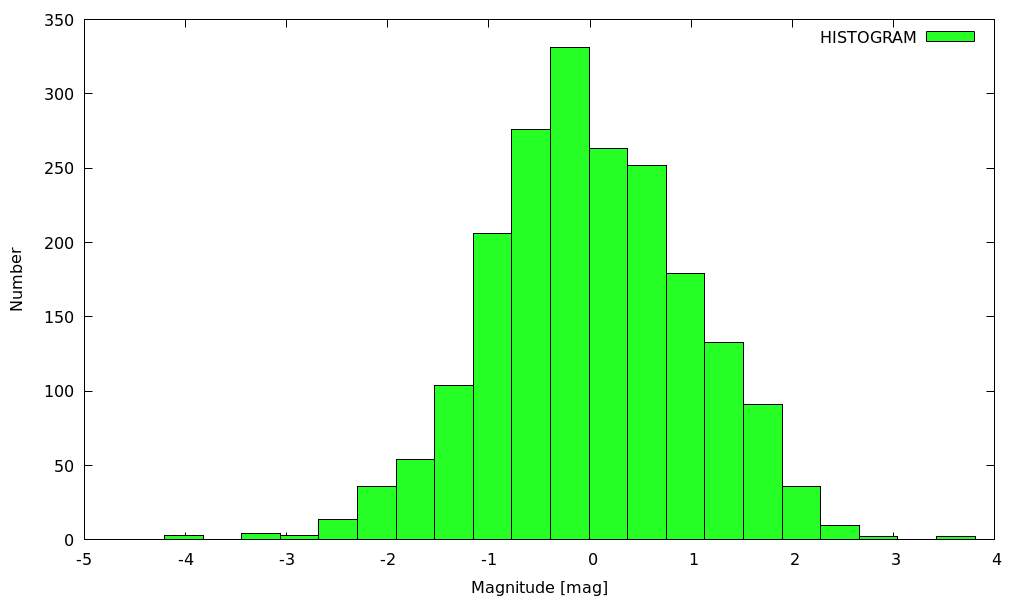

In [52]:
%%gnuplot
reset session
set xlabel "Magnitude [mag]"                                                           # ustawienie opisu osi x
set ylabel "Number"                                                                    # ustawienie opisu osi y
set style fill solid 0.85 border lt -1                                                 # wypełnienie słupków histogramu
plot 'histogram.dat' using 1:2 w boxes lc rgb "green" title "HISTOGRAM"                # rysowanie histogramu

## __9.3 Wiele wykresów na jednym obrazku - `multiplot`__

Spróbujmy narysować oba te wykresy na jednym obrazku. Służy do tego komenda `set multiplot`. Należy wskazać ile ma być wierszy i kolumn na obazku za pomocą modyfkiatora `layout`.

In [53]:
%gnuplot inline pngcairo size 1024,1024

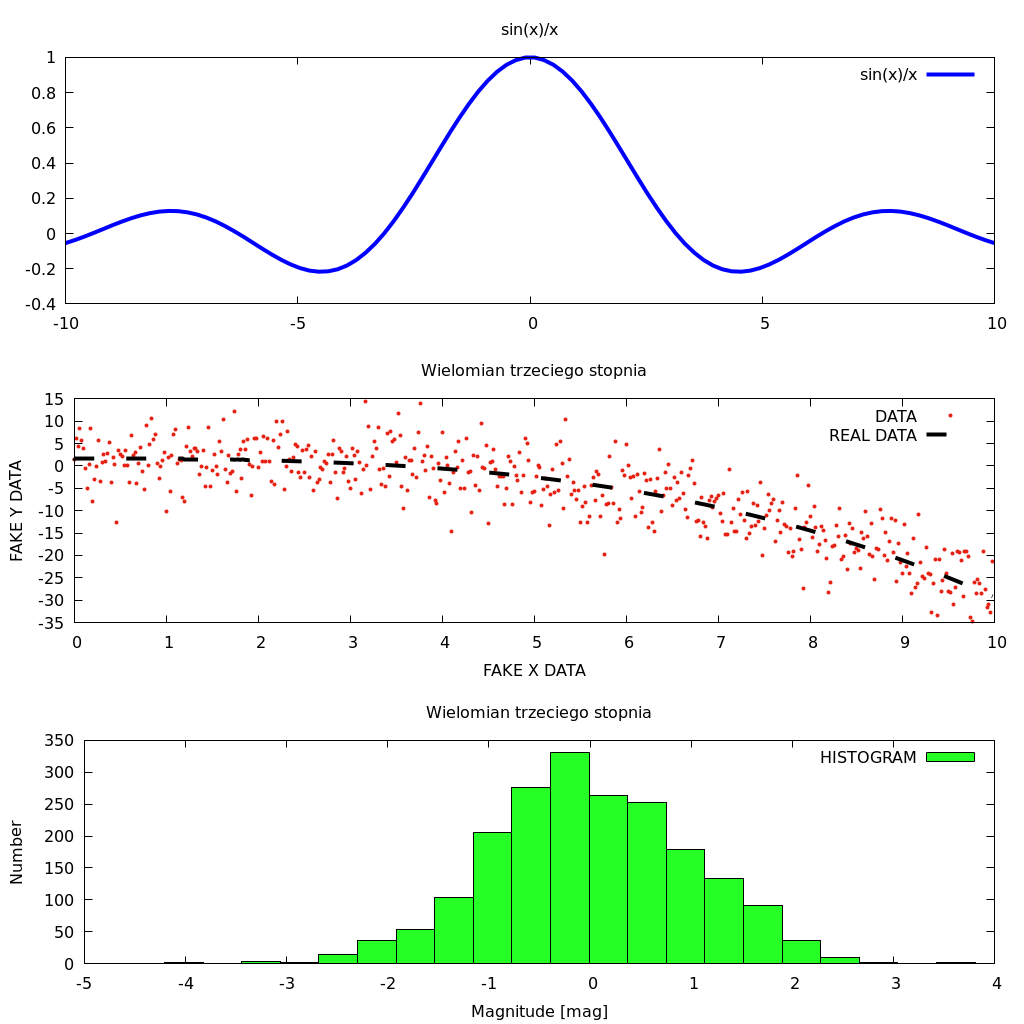

In [54]:
%%gnuplot
reset session
set multiplot layout 3, 1
set tmargin 3
set title "sin(x)/x"
plot sin(x)/x w l lw 4 lc rgb 'blue'

set title "Wielomian trzeciego stopnia"
set xlabel "FAKE X DATA"                                                           # ustawienie opisu osi x
set ylabel "FAKE Y DATA" 
p 'fake_data.dat' w p pt 7 lc 7 ps 0.5 title "DATA", 'gen_data.dat' w l lc 8 lw 4 dt 2 title "REAL DATA"

set xlabel "Magnitude [mag]"                                                           # ustawienie opisu osi x
set ylabel "Number"                                                                    # ustawienie opisu osi y
set style fill solid 0.85 border lt -1                                                 # wypełnienie słupków histogramu
plot 'histogram.dat' using 1:2 w boxes lc rgb "green" title "HISTOGRAM"                # rysowanie histogramu
unset multiplot

## __9.4 Skrypt__

Wszystkie komendy można wpisać do pliku i uruchomić pod gnuplotem, aby zautomatyzować np. generowanie wykresów. Taki skrypt gnuplota można uruchomić w pętli w bashu i automatycznie wygenerować wykresy. Wpiszmy wszystkie wcześniejsze komendy do jednego pliku `gpl_skrypt.gpl`:

In [ ]:
%%gnuplot
set term pngcairo size 1024,1024 font "Ubuntu Condensed, 16"                           # ustawienie wyjścia jako plik png, jego rozmiar oraz czcionka na wykresie
set output "wykresy.png"                                                               # ustawienie nazwy pliku


# DEFINICJA FUNKCJI I DOPASOWANIE DO DANYCH
f(x) = a*x**3 + b*x**2 + c*x +d
fit f(x) 'fake_data.dat' via a,b,c,d    # dopasowanie f(x) do danych z pliku

set multiplot layout 3, 1
set tmargin 3
set title "sin(x)/x"                                                                   # tytuł pierwszego wykresu
plot sin(x)/x w l lw 4 lc rgb 'blue'

set title "Wielomian trzeciego stopnia"                                                # tytuł drugiego wykresu
set xlabel "FAKE X DATA"                                                               # ustawienie opisu osi x
set ylabel "FAKE Y DATA" 
p 'fake_data.dat' w p pt 7 lc 7 ps 0.7 title "DATA", a*x**3+b*x**2+c*x+d w l lw 4 lc 2 title 'FITTED FUNCTION', 'gen_data.dat' w l lc 8 lw 6 dt 2 title "REAL DATA"


set title "HISTOGRAM"                                                                  # tytuł trzeciego wykresu
set xlabel "Magnitude [mag]"                                                           # ustawienie opisu osi x
set ylabel "Number"                                                                    # ustawienie opisu osi y
set style fill solid 0.85 border lt -1                                                 # wypełnienie słupków histogramu
plot 'histogram.dat' using 1:2 w boxes lc rgb "green" title "HISTOGRAM"                # rysowanie histogramu
unset multiplot

Teraz w `bash`-u można uruchomić skrypt wpisując w terminalu: `gnuplot gpl_skrypt.gpl`